In [18]:
from audiodiffusion.audio_encoder import AudioEncoder
import torchaudio
import os
from tqdm import tqdm
import random as r
# from sklearn import KMeans
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
#https://huggingface.co/teticio/audio-encoder
audio_encoder = AudioEncoder.from_pretrained("teticio/audio-encoder")

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


In [12]:
path = "data/rendered_audio/rendered_audio/"
files = os.listdir(path)
r.shuffle(files)
fs = []
embeddings = []

for file in tqdm(files[:400]):
    if ".flac" in file:
        full_path = path + file
        fs.append(full_path)
        audio, _ = torchaudio.load(full_path)
        encoding = audio_encoder.encode([full_path])
        embeddings.append(encoding.squeeze(0).numpy())



100%|████████| 400/400 [00:23<00:00, 17.35it/s]


In [37]:
pca = PCA(n_components=2, svd_solver='full')
pca_ = pca.fit_transform(embeddings)

In [46]:
kmean_model = KMeans(n_clusters=12).fit(embeddings)

In [47]:
labels = kmean_model.predict(embeddings)

AttributeError: PathCollection.set() got an unexpected keyword argument 'size'

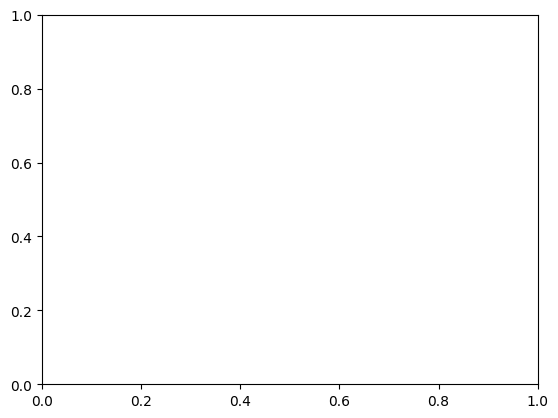

In [50]:
import matplotlib.pyplot as plt
 
#plotting the results
for idx, val in enumerate(pca_):
    plt.scatter(pca_[idx][0] , pca_[idx][1], size=labels[idx])
plt.show()